In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data.head(4)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False


In [4]:
X = data.copy()
y = X.pop('Transported')

In [5]:
X.drop('Name',axis=1, inplace=True)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
dtypes: float64(6), object(6)
memory usage: 815.1+ KB


Does the "PassengerId" column have a correlation with the target?

In [7]:
X.PassengerId  = X.PassengerId.map(lambda x: int(x[:4]) )

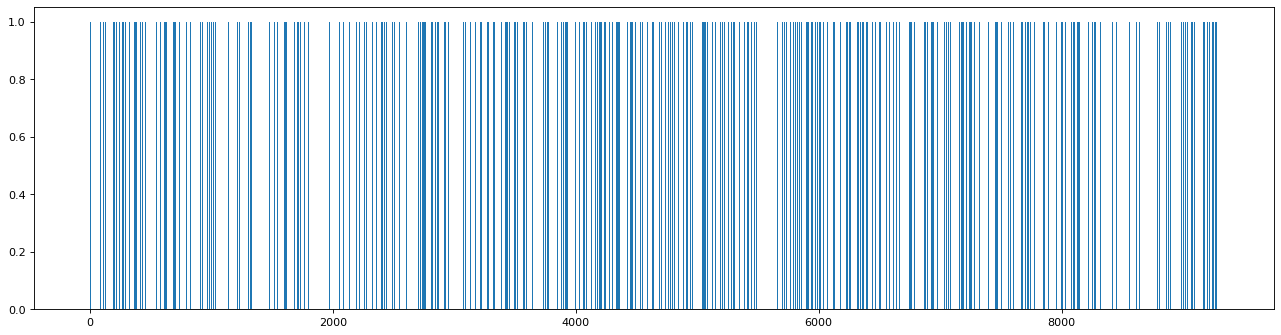

In [8]:
figure(figsize = (20, 5), dpi = 80)
plt.bar(X.PassengerId, height=y*1);

Blue bars are distributed equally; no correlation

In [9]:
X.drop('PassengerId', axis=1, inplace=True)

In [10]:
X.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

As seen above, all columns have missing values. Our first approch, once we reach the pipelines section, will be imputing these

In [11]:
X.Destination.value_counts()  #CHECK

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [12]:
string = '12/P/tom '
string = string.split('/')
string

['12', 'P', 'tom ']

In [13]:
X.Cabin[0].split('/')

['B', '0', 'P']

Divide Cabin into 3 different columns: deck, number, and side (P or S)

In [14]:
def assign(cell):
    if type(cell) == float:
        return pd.Series([0,0,0])
    cell = cell.split('/')
    return pd.Series([cell[0], cell[1], cell[2]])

X[['deck','room_num','side']] = X.Cabin.apply(assign)

In [15]:
X.drop('Cabin', axis=1, inplace=True)

In [16]:
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,room_num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1,S


In [17]:
def bar_plot(column, plot=True):
    values = list(X[column].unique().astype(str))
    values_mean = {}
    for value in values:
        values_mean[value] = data.loc[X[column] == value].Transported.sum()
    values_mean = dict(sorted(values_mean.items(), key = lambda item: item[1]))
    
    figure(figsize = (20, 6), dpi = 80)
    if plot == True:
        plt.bar(values_mean.keys(), values_mean.values());
    return values_mean

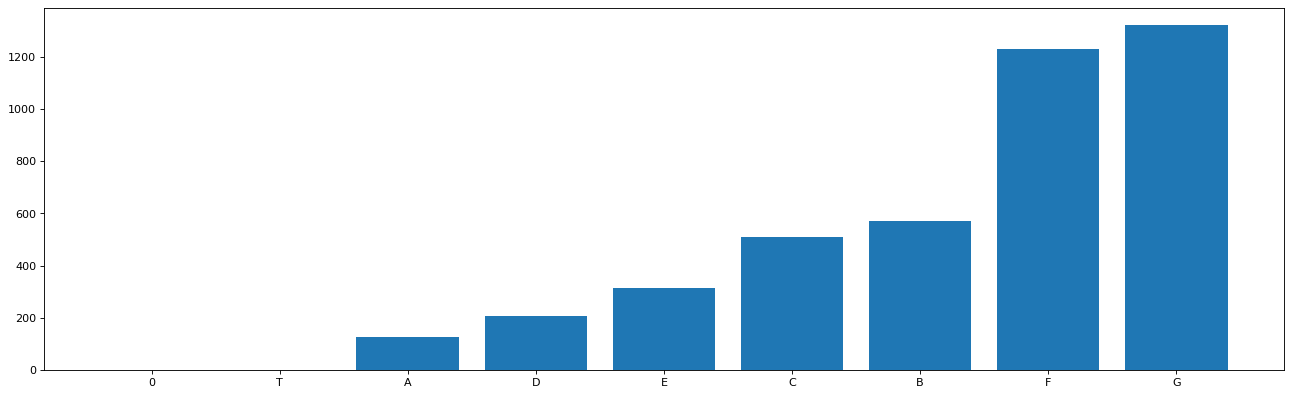

In [18]:
deck_mean = bar_plot('deck')

TO replace with ordinal numbers

In [19]:
g1 = [0,1,2,3]
g1[0] = list(deck_mean.keys())[:2]
g1[1] = list(deck_mean.keys())[2:5]
g1[2] = list(deck_mean.keys())[5:7]
g1[3] = list(deck_mean.keys())[7:]

for x in range(len(g1)):
    X.deck.replace(g1[x], x, inplace=True)

In [20]:
X.deck[:8]

0    2
1    3
2    1
3    1
4    3
5    3
6    3
7    3
Name: deck, dtype: int64

In [21]:
deck_mean

{'0': 0,
 'T': 1,
 'A': 127,
 'D': 207,
 'E': 313,
 'C': 508,
 'B': 572,
 'F': 1229,
 'G': 1321}

In [22]:
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,deck,room_num,side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,2,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,3,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,1,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,1,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,3,1,S


Remaining: One Hot Encode 'HomePlanet', 'Destination' and 'side', as well as standarizing and setting 'VIP' and 'CryoSleep' to 1s and 0s

In [23]:
X.side.value_counts()

S    4288
P    4206
0     199
Name: side, dtype: int64

In [24]:
from sklearn.preprocessing import OrdinalEncoder
X['VIP'] = X['VIP'] *1

Creating function to turn bool to int

In [25]:
def bool_to_int(X, cols):
    for col in cols:
        X[col] = X[col] *1
    return X

X = bool_to_int(X, ['VIP', 'CryoSleep'])

In [26]:
cat_cols = [cname for cname in X.columns if
                    X[cname].nunique() < 10 and 
                    X[cname].dtype == "object"]

num_cols = [cname for cname in X.columns if 
                X[cname].dtype in ['int64', 'float64']]

Summarizing the data engineering process so far:

In [27]:
def assign(cell):
    if type(cell) == float:
        return pd.Series([0,0,0])
    cell = cell.split('/')
    return pd.Series([cell[0], cell[1], cell[2]])


def bool_to_int(X, cols):
    for col in cols:
        X[col] = X[col] *1
    return X


def pandas_transform(x):
    if 'PassengerId' in list(x.columns):
        x.drop('PassengerId', axis=1, inplace=True)
    
    if 'Cabin' in list(x.columns):
        x[['deck','room_num','side']] = x.Cabin.apply(assign)
        x.drop('Cabin', axis=1, inplace=True)
    
    x[['deck', 'side']] = x[['deck', 'side']].astype(str)
    x['room_num'] = x['room_num'].astype(int)
    
    deck_mean = {'0': 0,
     'T': 1,
     'A': 127,
     'D': 207,
     'E': 313,
     'C': 508,
     'B': 572,
     'F': 1229,
     'G': 1321}
    
    g1 = [0,1,2,3]
    g1[0] = list(deck_mean.keys())[:2]
    g1[1] = list(deck_mean.keys())[2:5]
    g1[2] = list(deck_mean.keys())[5:7]
    g1[3] = list(deck_mean.keys())[7:]

    for y in range(len(g1)):
        x.deck.replace(g1[y], y, inplace=True)
        
    x = bool_to_int(x, ['VIP', 'CryoSleep'])
    
    return x

In [28]:
cat_cols

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'side']

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer


cat_transform_ohe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

cat_transform_ord = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

imputers = ColumnTransformer([
    ('cat_imputer_ohe', cat_transform_ohe, ['HomePlanet','Destination','side']),
    ('cat_imputer_ord', cat_transform_ord, ['CryoSleep', 'VIP']),
    ('num_imputer', SimpleImputer(strategy='mean'), num_cols)
    ])

In [30]:
def make_pipeline(model):
    return Pipeline([
        ('imputers', imputers),
        ('num_transforms', StandardScaler()),
        ('model', model)
        ])

Going from zero with original X data

In [31]:
X = data.copy().drop('Transported', axis=1)
X = pandas_transform(X)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {'model__n_estimators':[50* x for x in range(1,8)]}

pipeline = make_pipeline(RandomForestClassifier())

search = GridSearchCV(pipeline, params)

In [68]:
search.fit(X,y);

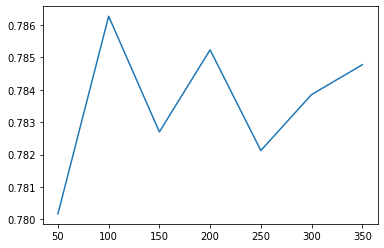

In [69]:
plt.plot(search.param_grid['model__n_estimators'],search.cv_results_['mean_test_score'] );

In [70]:
search.best_score_

0.7862664613539917

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

params={'model__n_neighbors':[3,5,8,11,15,30]}
pipe2 = make_pipeline(KNeighborsClassifier())
search2 = GridSearchCV(pipe2, params, cv = 3)
search2.fit(X,y);

In [63]:
search2.best_score_

0.7768333042304617

In [64]:
search2.best_params_

{'model__n_neighbors': 15}

In [66]:
from xgboost import XGBClassifier

params={'model__n_estimators':[10,50,100,200], 'model__max_depth':[10,50,100,200]}
pipe3 = make_pipeline(XGBClassifier())
search3 = GridSearchCV(pipe3, params, cv = 3)
search3.fit(X,y);

In [67]:
search3.best_score_

0.7915582058623585

In [109]:
search3.param_grid

{'model__n_estimators': [10, 50, 100, 200],
 'model__max_depth': [10, 50, 100, 200]}

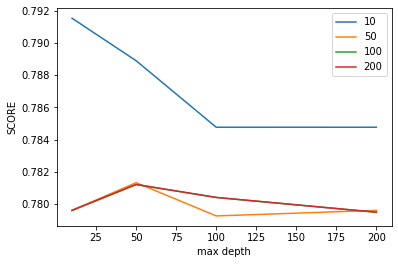

In [103]:
i = 0
for x in search3.param_grid['model__n_estimators']:
    plt.plot(search3.param_grid['model__max_depth'],search3.cv_results_['mean_test_score'][0+4*i:4+4*i], label = x);
    i+=1
plt.xlabel('max depth')
plt.ylabel('SCORE')
plt.legend(search3.param_grid['model__n_estimators']);

In [104]:
pipe3f = make_pipeline(XGBClassifier(n_estimators=10, max_depth=10))
pipe3f.fit(X,y);

In [106]:
X_test = pd.read_csv('data/test.csv')
X_test = pandas_transform(X_test)

preds = pipe3f.predict(X_test)
output = pd.DataFrame({'PassengerId': pd.read_csv('data/test.csv').PassengerId,
                       'Transported': preds>0.5})
output.to_csv('./submission.csv', index=False)

Results: 0.79 accuracy on kaggle's competition test set, while top 1 participant got 0.82 accuracy

Second approach: dropping na

In [107]:
X2 = data.copy()
X2.dropna(inplace=True)
y2 = X2.pop('Transported')

In [108]:
X2 = pandas_transform(X2)

In [110]:
params={'model__n_estimators':[10,50,100,200], 'model__max_depth':[10,50,100,200]}
pipe4 = make_pipeline(XGBClassifier())
search4 = GridSearchCV(pipe4, params, cv = 3)
search4.fit(X2,y2);

In [111]:
search4.best_score_

0.793369663941871

In [112]:
search4.best_params_

{'model__max_depth': 10, 'model__n_estimators': 10}

In [113]:
pipe4f = make_pipeline(XGBClassifier(n_estimators=10, max_depth=10))
pipe4f.fit(X2,y2);

X_test = pd.read_csv('data/test.csv')
X_test = pandas_transform(X_test)

preds = pipe4f.predict(X_test)
output = pd.DataFrame({'PassengerId': pd.read_csv('data/test.csv').PassengerId,
                       'Transported': preds>0.5})
output.to_csv('./submission2.csv', index=False)

Results: while having a slightier better result in validation sets, performed worse in test data in kaggle, with an accuracy of 0.78 (not a great difference though)